#### Colour models
**R, G, B** convention to image processing. This means the image has 3 layers. The image we see is a composite of the 3 layers, a linear combination of the layers. 

* (x_pixels, y_pixels, 3) In python, the y-pixels are first showed.

*Each layer is a raster.

**C, M, Y, K** convention. It has 4 layers. 

* (x_pixels, y_pixels, 4)

#### Image extensions
* Pixelated images: .ppm, .png, .jpg, .jpeg
* Vectorized images: .ps, .eps, .svg

# Images and matrix algebra in Python

The cbook library

https://matplotlib.org/stable/api/cbook_api.html

In [1]:
import matplotlib.cbook as cbook
import matplotlib.pyplot as plt

### 1. Open images with cbook:

To open images, we can use get_sample_data().

The image below was taken from:

https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/M82.jpg

In [3]:
# Put image into an object for which we need to provide the full path

image_file = cbook.get_sample_data("/home/prostofsound/jnotebooks/computational-physics-1/Notes/data/M82.jpg")

# Inspect the object

print(type(image_file))


<class '_io.BufferedReader'>


In [ ]:
# Put the seconf image in the buffer

yog_bacteria_im = cbook.get_sample_data("/Users/wbandabarragan/Library/CloudStorage/Dropbox/Teaching_Arxiv/physics-teaching-data/1D-data/bacteria31.jpg")

# Inspect the object

print(type(yog_bacteria_im))


### 2. We can use imread() to read images:

In [4]:
# New image object:
image = plt.imread(image_file)

print(type(image))

print(image.shape)

<class 'numpy.ndarray'>
(404, 520, 3)


404 rows, 520 columns and 3 layers.

In [ ]:
# New image object:
image2 = plt.imread(yog_bacteria_im)

print(type(image2))

print(image2.shape)

### 3. Identify the rasters

### The imshow() function

This function can be called to display data as an image on a 2D regular raster.

Image taken from: https://docs.qgis.org/3.4/en/docs/gentle_gis_introduction/raster_data.html


We notice we have a three-layered RGB image.

### 4. Represent full image:

plt.imshow()

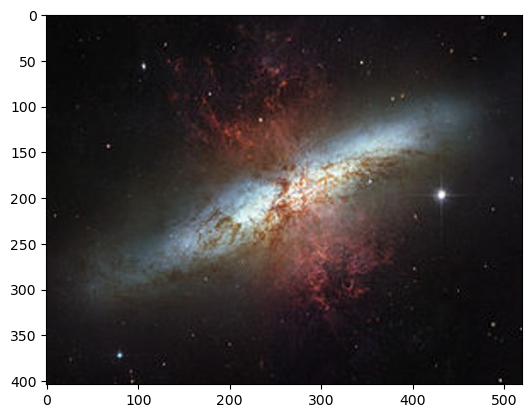

In [5]:
plt.figure()

plt.imshow(image)

plt.show()

In [ ]:
plt.figure()

plt.imshow(image2)

plt.show()

### 5. See composition

#### How is an image composed?

An image is composed of several layers. In this case, RGB format, we have 3 layers.

R -> pixels can take values between 0, 255 (intensity)


B -> pixels can take values between 0, 255 (intensity)


G -> pixels can take values between 0, 255 (intensity)

In [6]:
print(image.shape)

(404, 520, 3)


In [7]:
# Use indexing:

imageR = image[:, :, 0]
imageG = image[:, :, 1]
imageB = image[:, :, 2]

print(imageR.shape, imageG.shape, imageB.shape)

(404, 520) (404, 520) (404, 520)


### 6. Plot the different colours:

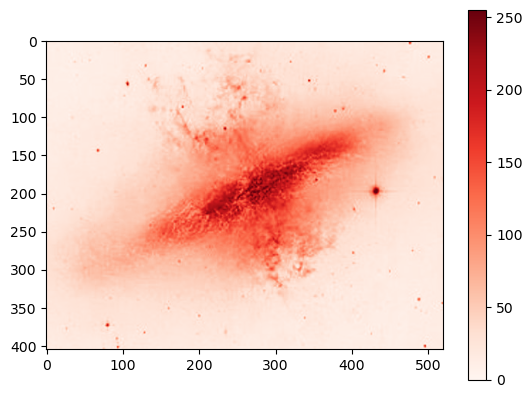

In [8]:
plt.figure()

z = plt.imshow(imageR, cmap = "Reds")
plt.colorbar(z)

plt.show()

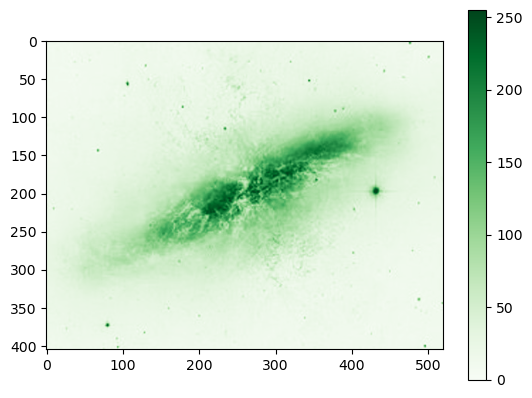

In [9]:
plt.figure()

z = plt.imshow(imageG, cmap = "Greens")
plt.colorbar(z)

plt.show()

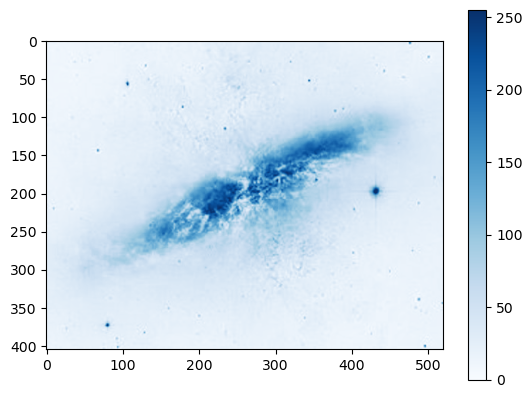

In [10]:
plt.figure()

plt.imshow(imageB, cmap = "Blues")
plt.colorbar()

plt.show()

In [ ]:
# Use indexing:

imageR2 = image2[:, :, 0]
imageG2 = image2[:, :, 1]
imageB2 = image2[:, :, 2]

print(imageR2.shape, imageG2.shape, imageB2.shape)

In [ ]:
plt.figure()

z = plt.imshow(imageR2, cmap = "Reds")
plt.colorbar(z)

plt.show()

In [ ]:
plt.figure()

z = plt.imshow(imageG2, cmap = "Greens")
plt.colorbar(z)

plt.show()

In [ ]:
plt.figure()

z = plt.imshow(imageB2, cmap = "Blues")
plt.colorbar(z)

plt.show()

### 7. Analyse individual layers

#### Important

- Images are layered matrices of the form ($m\times n$)!

- We can then use linear algebra and all sort of linear operations on them.

- Computationally speaking images are arrays.

In [11]:
import numpy as np

In [13]:
print(imageR.shape[1]) #to get the number of rows
print(imageG.shape)
print(imageB.shape)

520
(404, 520)
(404, 520)


In [14]:
print(type(imageR[0][0]))
print(type(imageG[0][0]))
print(type(imageB[0][0]))

<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


In [18]:
print(np.min(imageR), np.max(imageR))
print(np.min(imageG), np.max(imageG))
print(np.min(imageB), np.max(imageB))

print(imageR)

0 255
0 255
0 255
[[15 14 11 ... 12 11 11]
 [15 14 12 ... 12 12 11]
 [15 14 12 ... 12 12 12]
 ...
 [15 15 15 ... 12 12 12]
 [15 15 15 ... 12 12 12]
 [15 15 15 ... 12 12 12]]


In [17]:
# Get the total pixel count, multiply number of rows times number of columns:
print(imageR.size)
print(imageG.size)
print(imageB.size)


210080
210080
210080


## Surfaces:

In [23]:
# Create a meshgrid

x = np.linspace(0, imageR.shape[0], imageR.shape[0])
y = np.linspace(0, imageR.shape[1], imageR.shape[1])
print(x.shape, y.shape)

x_2d, y_2d = np.meshgrid(y, x)

#print(x_2d.shape, y_2d.shape)

(404,) (520,)


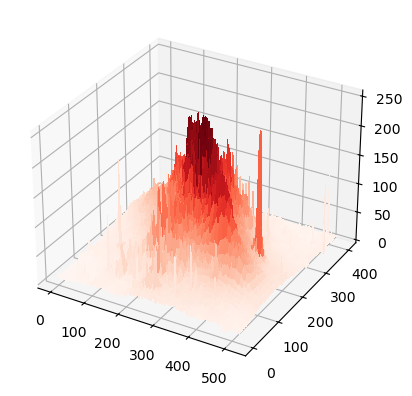

In [24]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d, y_2d, imageR, cmap = "Reds", antialiased=False)

plt.show()

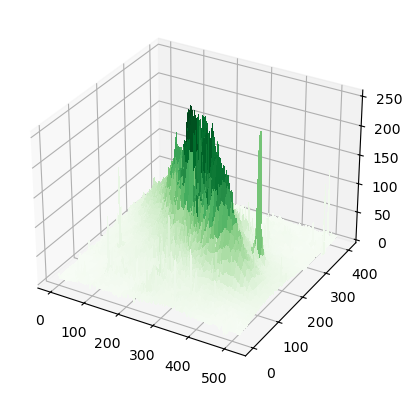

In [25]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d, y_2d, imageG, cmap = "Greens", antialiased=False)

plt.show()

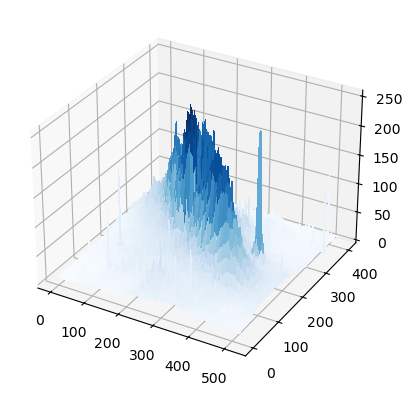

In [26]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d, y_2d, imageB, cmap = "Blues", antialiased=False)

plt.show()

In [ ]:
# Create a meshgrid

x2 = np.linspace(0, imageR2.shape[0], imageR2.shape[0])
y2 = np.linspace(0, imageR2.shape[1], imageR2.shape[1])
print(x2.shape, y2.shape)

x_2d2, y_2d2 = np.meshgrid(y2, x2)

#print(x_2d.shape, y_2d.shape)

In [ ]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d2, y_2d2, imageR2, cmap = "Reds", antialiased=False)

plt.show()

In [ ]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d2, y_2d2, imageG2, cmap = "Greens", antialiased=False)

plt.show()

In [ ]:

# Plotting with a figure environment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(x_2d2, y_2d2, imageB2, cmap = "Blues", antialiased=False)

plt.show()

### 8. Pixel histograms:

If we have 2D arrays, it is better to linearise them/reshape them into 1D arrays.


See documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [27]:
# Reshape them into 1D arrays (flatten)
imageR_1D = np.reshape(imageR, (imageR.size, 1))
imageB_1D = np.reshape(imageB, (imageB.size, 1))                   
imageG_1D = np.reshape(imageG, (imageG.size, 1))
                       
print(imageR_1D.shape, imageB_1D.shape, imageG_1D.shape)
                                     

(210080, 1) (210080, 1) (210080, 1)


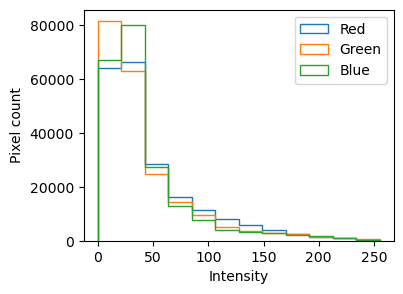

In [28]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageR_1D, bins = 12, histtype='step', label='Red')
plt.hist(imageG_1D, bins = 12, histtype='step', label='Green')
plt.hist(imageB_1D, bins = 12, histtype='step', label='Blue')
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

In [29]:
# Reshape them into 1D arrays (flatten)
imageR_1D2 = np.reshape(imageR2, (imageR2.size, 1))
imageB_1D2 = np.reshape(imageB2, (imageB2.size, 1))                   
imageG_1D2 = np.reshape(imageG2, (imageG2.size, 1))
                       
print(imageR_1D2.shape, imageB_1D2.shape, imageG_1D2.shape)

NameError: name 'imageR2' is not defined

In [ ]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageR_1D2, bins = 12, histtype='step', label='Red')
plt.hist(imageG_1D2, bins = 12, histtype='step', label='Green')
plt.hist(imageB_1D2, bins = 12, histtype='step', label='Blue')
plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

### Image manipulation:

#### Transpose:

In [30]:
imageR_transpose = imageR.T
#imageR_transpose = imageR.transpose()

print(imageR.shape, imageR_transpose.shape)

(404, 520) (520, 404)


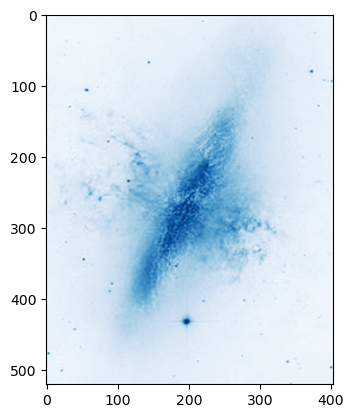

In [31]:
plt.figure()

plt.imshow(imageR_transpose, cmap = "Blues")

plt.show()

### Adding matrices:

In [40]:
sum_image = 0.8*imageR + 0.001*imageG + 0.001*imageB

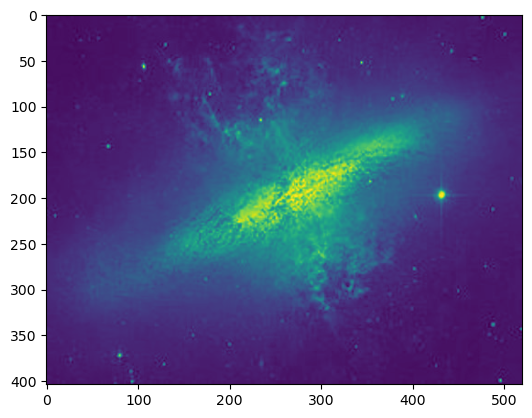

In [41]:
plt.figure()

plt.imshow(sum_image, cmap = "viridis")

plt.show()

#### Masking:

In [42]:
import matplotlib.patches as patches

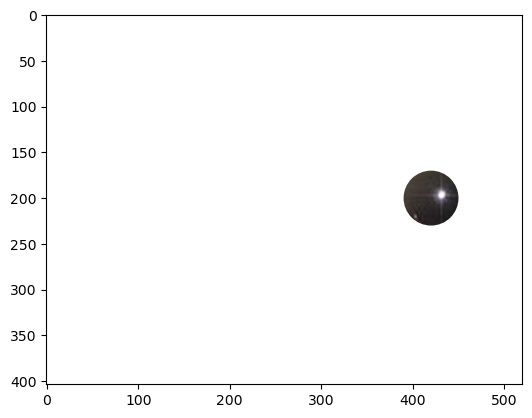

In [43]:
fig, ax = plt.subplots()

im = ax.imshow(image)

patch = patches.Circle((420, 200), radius=30, transform=ax.transData)

im.set_clip_path(patch)

plt.show()

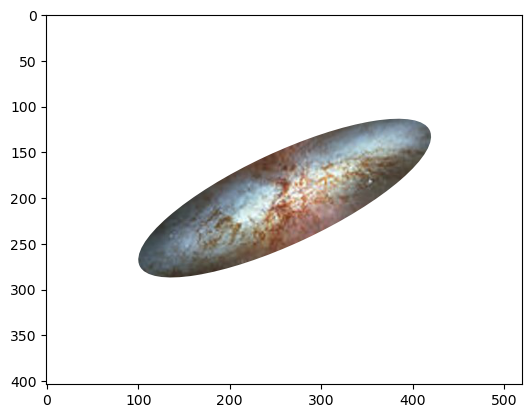

In [44]:
fig, ax = plt.subplots()

im = ax.imshow(image)

patch = patches.Ellipse((260, 200),width =350, height=100, angle=155.0, transform=ax.transData)

im.set_clip_path(patch)

plt.show()

### Atenuate colours:

In [45]:
# Divide intensities by 2:
imageB_at = imageB//2
imageR_at = imageR//2

# Flatten the array into 1D
imageB_at_1D = np.reshape(imageB_at, (imageB_at.size, 1))

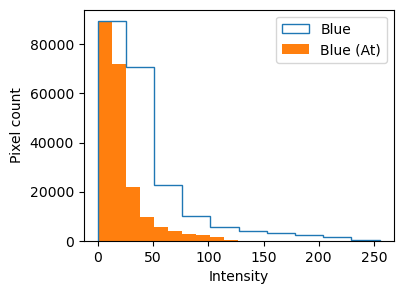

In [46]:
# Plotting some histograms

plt.figure(figsize=(4,3))
plt.hist(imageB_1D, histtype='step', label='Blue')
plt.hist(imageB_at_1D, label='Blue (At)')

plt.xlabel("Intensity")
plt.ylabel("Pixel count")
plt.legend()
plt.show()

In [47]:
# New atenuated image
image_at = np.zeros((imageR.shape[0], imageR.shape[1], 3), dtype = int)
image_at2 = np.zeros((imageR.shape[0], imageR.shape[1], 3), dtype = int)

print(image_at.shape)

(404, 520, 3)


In [50]:
# Lets assing the layers:

image_at[:, :, 0] = imageR #original
image_at[:, :, 1] = imageG #original
image_at[:, :, 2] = imageB_at #atenuated blue


# Lets assing the layers:

image_at2[:, :, 0] = imageR_at
image_at2[:, :, 1] = imageG
image_at2[:, :, 2] = imageB

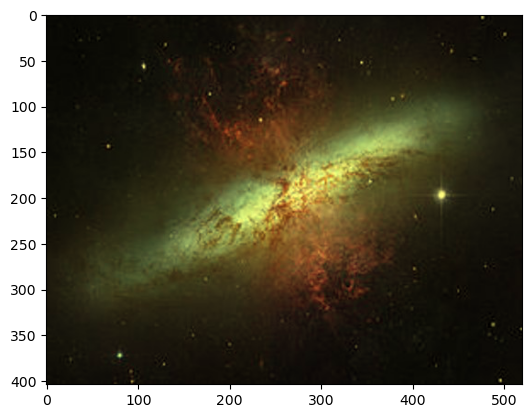

In [51]:
plt.figure()

plt.imshow(image_at)

plt.show()

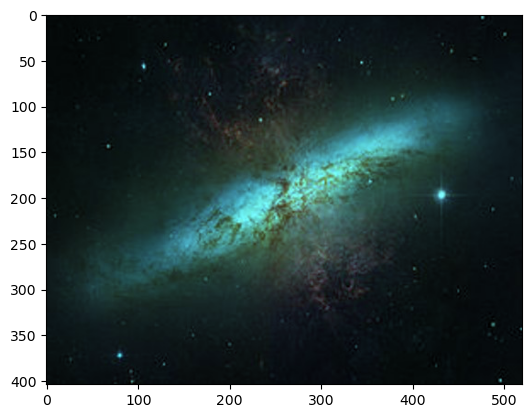

In [52]:
plt.figure()

plt.imshow(image_at2)

plt.show()

In [ ]:
# Divide intensities by 2:
imageG_at2 = imageG2//2

# Flatten the array into 1D
imageG_at_1D = np.reshape(imageG_at2, (imageG_at2.size, 1))

In [ ]:
# New atenuated image
image_at_bact = np.zeros((imageR2.shape[0], imageR2.shape[1], 3), dtype = int)

print(image_at_bact.shape)

In [ ]:
# Lets assing the layers:

image_at_bact[:, :, 0] = imageR2
image_at_bact[:, :, 1] = imageG_at2
image_at_bact[:, :, 2] = imageB2

In [ ]:
plt.figure()

plt.imshow(image_at_bact)

plt.show()